## 06-trees - Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able [link](https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv):

```bash
wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
```

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `'JAMB_Score'`).


### Preparing the dataset 

First, let's make the names lowercase:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Preparation:

* Remove the `student_id` column.
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


In [2]:
# Data cleaning and preparation

url = "https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv"

In [3]:
# !wget $url -O jamb_exam_results.csv

In [4]:
!head jamb_exam_results.csv

JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,None,1
182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
202,25,85,2,13.6,Public,Urban,Yes,No,Medium,Low,6,15,Male,Low,Tertiary,1
251,35,85,4,2.6,Public,Urban,No,Yes,Low,Medium,7,16,Female,Medium,Primary,4
129,27,75,3,9.4,Public,Urban,No,Yes,Low,Medium,8,19,Female,Low,Tertiary,3
220,23,85,3,4.6,Public,Rural,No,No,Low,Medium,9,19,Female,Medium,Tertiary,1


In [5]:
df = pd.read_csv(url)
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,None,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [6]:
df.shape

(5000, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,None,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [9]:
df.drop('student_id', axis=1, inplace=True)
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,None,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [10]:
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [11]:
df.describe().round()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,age,assignments_completed
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,174.0,20.0,84.0,3.0,10.0,18.0,2.0
std,48.0,10.0,9.0,1.0,5.0,2.0,1.0
min,100.0,0.0,50.0,1.0,0.0,15.0,1.0
25%,135.0,13.0,78.0,2.0,7.0,16.0,1.0
50%,170.0,19.0,84.0,2.0,10.0,18.0,1.0
75%,209.0,26.0,91.0,3.0,13.0,20.0,2.0
max,367.0,40.0,100.0,5.0,20.0,22.0,5.0


In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = (df_train.jamb_score).values
y_val = (df_val.jamb_score).values
y_test = (df_test.jamb_score).values

In [15]:
df_train.drop('jamb_score', axis=1, inplace=True)
df_val.drop('jamb_score', axis=1, inplace=True)
df_test.drop('jamb_score', axis=1, inplace=True)

In [16]:
len(df_train), len(df_val), len(df_test)

(3000, 1000, 1000)

In [17]:
len(y_train), len(y_val), len(y_test)

(3000, 1000, 1000)

In [18]:
df_train

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,72,3,4.4,Public,Urban,No,Yes,Medium,Low,21,Female,Low,None,3
1,11,80,2,3.3,Public,Urban,Yes,Yes,Medium,High,22,Female,Medium,Secondary,1
2,31,82,1,8.3,Public,Urban,Yes,Yes,Low,High,19,Female,High,Tertiary,2
3,29,79,1,15.8,Public,Rural,Yes,Yes,Low,Low,19,Male,Low,Primary,2
4,28,96,2,8.9,Private,Rural,Yes,Yes,Medium,Low,19,Male,High,Secondary,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,79,3,12.2,Public,Urban,No,No,Low,High,17,Male,High,Secondary,1
2996,3,87,1,9.6,Public,Urban,No,No,Medium,Medium,17,Male,Medium,Primary,1
2997,17,96,4,13.7,Private,Urban,No,Yes,High,Medium,16,Male,Medium,Primary,2
2998,25,74,2,3.4,Public,Rural,No,No,High,High,21,Male,Low,Secondary,1


In [19]:
y_train

array([145, 231, 161, ..., 216, 234, 103])

In [20]:
# turn the dataframes into matrices
train_full_dicts = df_full_train.to_dict(orient='records')
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [21]:
train_dicts[0]

{'study_hours_per_week': 20,
 'attendance_rate': 72,
 'teacher_quality': 3,
 'distance_to_school': 4.4,
 'school_type': 'Public',
 'school_location': 'Urban',
 'extra_tutorials': 'No',
 'access_to_learning_materials': 'Yes',
 'parent_involvement': 'Medium',
 'it_knowledge': 'Low',
 'age': 21,
 'gender': 'Female',
 'socioeconomic_status': 'Low',
 'parent_education_level': 'None',
 'assignments_completed': 3}

In [22]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(train_full_dicts)
X_train = dv.fit_transform(train_dicts)
X_val = dv.fit_transform(val_dicts)
X_test = dv.fit_transform(test_dicts)

In [23]:
len(X_full_train), len(X_train), len(X_val), len(X_test)

(4000, 3000, 1000, 1000)

In [24]:
X_train

array([[ 0.,  1., 21., ...,  0., 20.,  3.],
       [ 0.,  1., 22., ...,  1., 11.,  2.],
       [ 0.,  1., 19., ...,  0., 31.,  1.],
       ...,
       [ 0.,  1., 16., ...,  1., 17.,  4.],
       [ 1.,  0., 21., ...,  0., 25.,  2.],
       [ 0.,  1., 17., ...,  0., 18.,  2.]])

## Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week`
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`

**Answer: `study_hours_per_week`**

In [25]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [26]:
y_pred = dt.predict(X_val)

In [27]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse = rmse.round(3)
rmse

45.803

In [28]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 22.13
* 42.13
* 62.13
* 82.12

**Answer: `42.13`**

In [29]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [30]:
y_pred = rf.predict(X_val)

In [31]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse = rmse.round(3)
rmse

41.825

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

**Answer: `80`**

In [32]:
scores = []

for n in range(10, 201, 10):
    rf = rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse = rmse.round(3)

    scores.append((n, rmse))

In [33]:
scores

[(10, 41.825),
 (20, 41.196),
 (30, 40.857),
 (40, 40.666),
 (50, 40.678),
 (60, 40.604),
 (70, 40.535),
 (80, 40.404),
 (90, 40.377),
 (100, 40.43),
 (110, 40.472),
 (120, 40.522),
 (130, 40.53),
 (140, 40.465),
 (150, 40.436),
 (160, 40.462),
 (170, 40.479),
 (180, 40.482),
 (190, 40.468),
 (200, 40.454)]

In [34]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

In [35]:
df_scores

,n_estimators,rmse
0,10,41.825
1,20,41.196
2,30,40.857
3,40,40.666
4,50,40.678
5,60,40.604
6,70,40.535
7,80,40.404
8,90,40.377
9,100,40.430


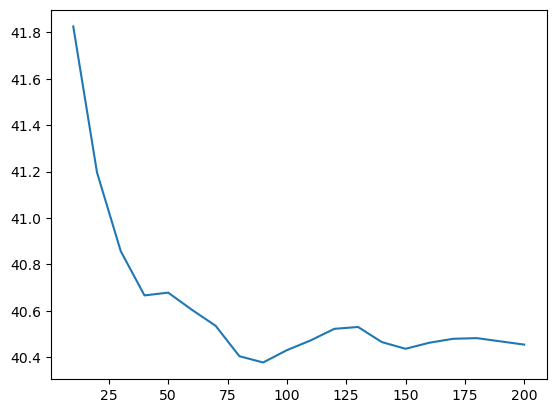

In [36]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [37]:
# Find the minimum RMSE and its corresponding n_estimators
min_rmse = df_scores['rmse'].min()
best_n = df_scores.loc[df_scores['rmse'] == min_rmse, 'n_estimators'].iloc[0]

print(f"Lowest RMSE: {min_rmse:.3f} at n_estimators = {best_n}")

Lowest RMSE: 40.377 at n_estimators = 90


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

**Answer: `10`**

In [38]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = rf = RandomForestRegressor(max_depth=d, n_estimators=n, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse = rmse.round(3)

        scores.append((d, n, rmse))

In [39]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [40]:
df_scores

,max_depth,n_estimators,rmse
0,10,10,41.073
1,10,20,40.853
2,10,30,40.623
3,10,40,40.334
4,10,50,40.320
...,...,...,...
75,25,160,40.450
76,25,170,40.467
77,25,180,40.471
78,25,190,40.460


In [41]:
# Calculate mean RMSE for each max_depth
mean_rmse_by_depth = df_scores.groupby('max_depth')['rmse'].mean()
mean_rmse_by_depth

max_depth
10    40.36500
15    40.63980
20    40.68450
25    40.61145
Name: rmse, dtype: float64

In [42]:
# Find the best max_depth
best_depth = mean_rmse_by_depth.idxmin()
best_depth

10

# Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split.
When doing it, we can calculate "gain" - the reduction in impurity before and after the split.
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field.

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)?

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`

**Answer: `study_hours_per_week`**

In [43]:
rf = RandomForestRegressor(n_estimators=10,
                                max_depth=20,
                                random_state=1,
                                n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [44]:
rf.feature_importances_

array([0.01093634, 0.01014068, 0.06981166, 0.03049321, 0.14898619,
       0.13492521, 0.01018578, 0.01170238, 0.01063523, 0.0088544 ,
       0.01757751, 0.01215927, 0.01102292, 0.01163625, 0.01497637,
       0.01496113, 0.01423605, 0.02199681, 0.01400047, 0.01108758,
       0.00998864, 0.00825745, 0.0095368 , 0.007989  , 0.02570122,
       0.00975894, 0.00986943, 0.24633057, 0.08224251])

In [45]:
feature_names = list(dv.get_feature_names_out())
feature_names

['access_to_learning_materials=No',
 'access_to_learning_materials=Yes',
 'age',
 'assignments_completed',
 'attendance_rate',
 'distance_to_school',
 'extra_tutorials=No',
 'extra_tutorials=Yes',
 'gender=Female',
 'gender=Male',
 'it_knowledge=High',
 'it_knowledge=Low',
 'it_knowledge=Medium',
 'parent_education_level=None',
 'parent_education_level=Primary',
 'parent_education_level=Secondary',
 'parent_education_level=Tertiary',
 'parent_involvement=High',
 'parent_involvement=Low',
 'parent_involvement=Medium',
 'school_location=Rural',
 'school_location=Urban',
 'school_type=Private',
 'school_type=Public',
 'socioeconomic_status=High',
 'socioeconomic_status=Low',
 'socioeconomic_status=Medium',
 'study_hours_per_week',
 'teacher_quality']

In [46]:
zip(feature_names, rf.feature_importances_)

In [47]:
# Create the DataFrame
feature_importances_df = pd.DataFrame(zip(feature_names, rf.feature_importances_), columns=['feature', 'importance'])

print(feature_importances_df.sort_values(by='importance', ascending=False))

                             feature  importance
27              study_hours_per_week    0.246331
4                    attendance_rate    0.148986
5                 distance_to_school    0.134925
28                   teacher_quality    0.082243
2                                age    0.069812
3              assignments_completed    0.030493
24         socioeconomic_status=High    0.025701
17           parent_involvement=High    0.021997
10                 it_knowledge=High    0.017578
14    parent_education_level=Primary    0.014976
15  parent_education_level=Secondary    0.014961
16   parent_education_level=Tertiary    0.014236
18            parent_involvement=Low    0.014000
11                  it_knowledge=Low    0.012159
7                extra_tutorials=Yes    0.011702
13       parent_education_level=None    0.011636
19         parent_involvement=Medium    0.011088
12               it_knowledge=Medium    0.011023
0    access_to_learning_materials=No    0.010936
8                   

In [48]:
# List of features to filter by
selected_features = ['study_hours_per_week', 'attendance_rate', 'distance_to_school', 'teacher_quality']

# Filter the DataFrame
filtered_df = feature_importances_df[feature_importances_df['feature'].isin(selected_features)]

print(filtered_df.sort_values(by='importance', ascending=False))


                 feature  importance
27  study_hours_per_week    0.246331
4        attendance_rate    0.148986
5     distance_to_school    0.134925
28       teacher_quality    0.082243


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value


**Answer: `0.1`**

In [49]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [50]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [58]:
scores = {}

In [64]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                 verbose_eval=5,
                  evals=watchlist)

In [60]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [65]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [66]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1'])

In [67]:
scores

{'eta=0.3':     num_iter  train_rmse  val_rmse
 0          0    42.69384  44.89114
 1          5    34.57756  40.69096
 2         10    31.63404  40.48319
 3         15    29.41497  40.86107
 4         20    27.49658  41.27921
 5         25    26.34353  41.57975
 6         30    24.21076  41.72928
 7         35    22.46394  42.03417
 8         40    21.35340  42.24363
 9         45    20.24355  42.27966
 10        50    19.25157  42.43824
 11        55    18.28398  42.54750
 12        60    17.12178  42.64446
 13        65    16.41573  42.77416
 14        70    15.78314  42.84909
 15        75    14.80007  43.00760
 16        80    13.96907  43.08250
 17        85    13.39102  43.16297
 18        90    12.46485  43.25161
 19        95    11.95568  43.37919
 20        99    11.39140  43.41882,
 'eta=0.1':     num_iter  train_rmse  val_rmse
 0          0    45.49999  47.00533
 1          5    40.17514  43.11181
 2         10    37.07490  41.39235
 3         15    35.08521  40.61341
 4   

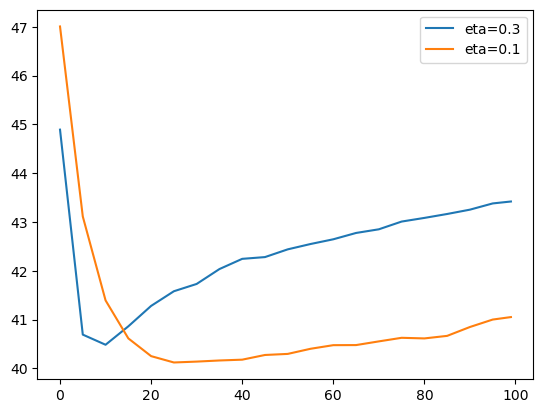

In [68]:
etas = ['eta=0.3', 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.legend()